In [1]:
import nltk
nltk.download('punkt')
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


[nltk_data] Downloading package punkt to C:\Users\Ritika
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_english = pd.read_csv("small_vocab_en.csv",sep = '\t' , names = ['english'])
df_french = pd.read_csv("small_vocab_fr.csv",sep = '\t' , names = ['french'])


In [3]:
df_english.head(10)

english
0  new jersey is sometimes quiet during autumn , ...
1  the united states is usually chilly during jul...
2  california is usually quiet during march , and...
3  the united states is sometimes mild during jun...
4  your least liked fruit is the grape , but my l...
5  his favorite fruit is the orange , but my favo...
6  paris is relaxing during december , but it is ...
7  new jersey is busy during spring , and it is n...
8  our least liked fruit is the lemon , but my le...
9  the united states is sometimes busy during jan...

In [4]:
print("df_english info :- ",df_english.info())
print("=========================================")
print("df_french info :- ",df_french.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
df_english info :-  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
df_french info :-  None


In [5]:
df = pd.concat([df_english,df_french],1)

In [6]:
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

In [7]:
print("Total English records : ", df_english.shape[0])
print("Total French records : ", df_french.shape[0])

Total English records :  137860
Total French records :  137860


In [8]:
import string
def msg_clean(msg):
    clean =  [(char) for char in msg if char not in string.punctuation]
    clean = "".join(clean)
    return clean

In [9]:
df['english'] = df['english'].apply(msg_clean)

In [10]:
df['french'] = df['french'].apply(msg_clean)

In [11]:
df

english  \
0       new jersey is sometimes quiet during autumn  a...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march  and ...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape  but my le...   
...                                                   ...   
137855  france is never busy during march  and it is s...   
137856  india is sometimes beautiful during spring  an...   
137857  india is never wet during summer  but it is so...   
137858  france is never chilly during january  but it ...   
137859  the orange is her favorite fruit  but the bana...   

                                                   french  
0       new jersey est parfois calme pendant l automne...  
1       les étatsunis est généralement froid en juille...  
2       california est généralement calme en mars  et ...  
3       les étatsunis est parfois légère en juin  et i...  
4       votre moins aimé fruit est le raisin  mais mon...  
...                                                   ...  
137855  la france est jamais occupée en mars  et il es...  
137856  l inde est parfois belle au printemps  et il e...  
137857  l inde est jamais mouillé pendant l été  mais ...  
137858  la france est jamais froid en janvier  mais il...  
137859  lorange est son fruit préféré  mais la banane ...  

[137860 rows x 2 columns]

In [12]:
#counting how many unique words do we have in english and french dictionaries
english_words = []
french_words = []
def get_unique_word( x, word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

        

In [13]:
df['english'].apply(lambda x : get_unique_word( x, english_words))
df['french'].apply(lambda x : get_unique_word( x, french_words))
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'étatsunis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 'lorange',
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 'naime',
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 'lautomne',
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'mangue

In [14]:
english_words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'they',
 'pears',
 'she',
 'little',
 'red',

In [15]:
total_english_words =  len(english_words)
total_english_words

199

In [16]:
total_french_words =  len(french_words)
total_french_words

345

In [17]:
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
words        

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [18]:
english_words_counts =  Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [19]:
english_words_counts = sorted(english_words_counts.items() , key = operator.itemgetter(1),reverse= True)
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [20]:
english_words = []
english_counts  = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])
    

In [21]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [22]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [23]:
fig  = px.bar(x =  english_words , y = english_counts)
fig.show()

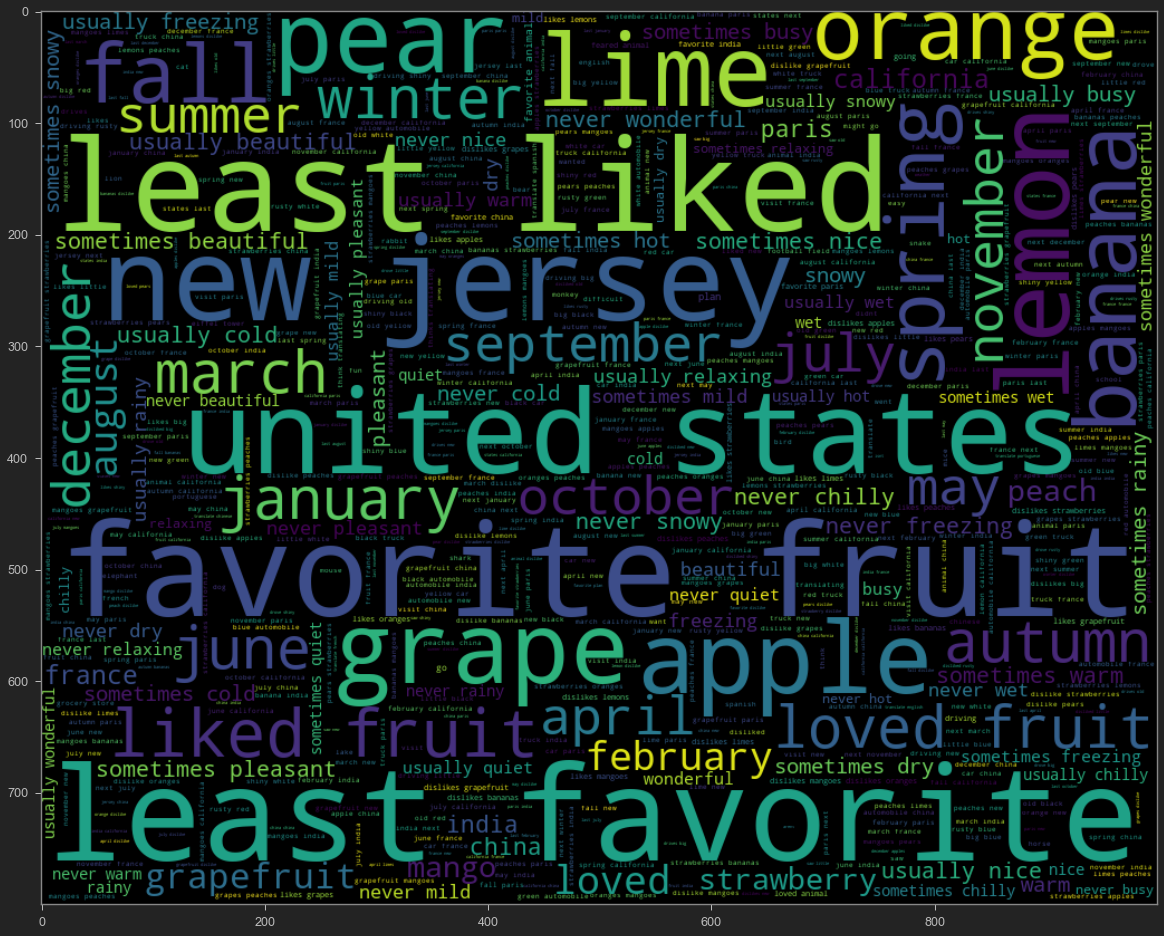

In [24]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000 , width=1000 , height=800).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [25]:
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english  = len(tokens)
print("The maximum number of words in any document  = " , maxlen_english)



The maximum number of words in any document  =  15


In [26]:
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french  = len(tokens)
print("The maximum number of words in any document  = " , maxlen_english)



The maximum number of words in any document  =  15


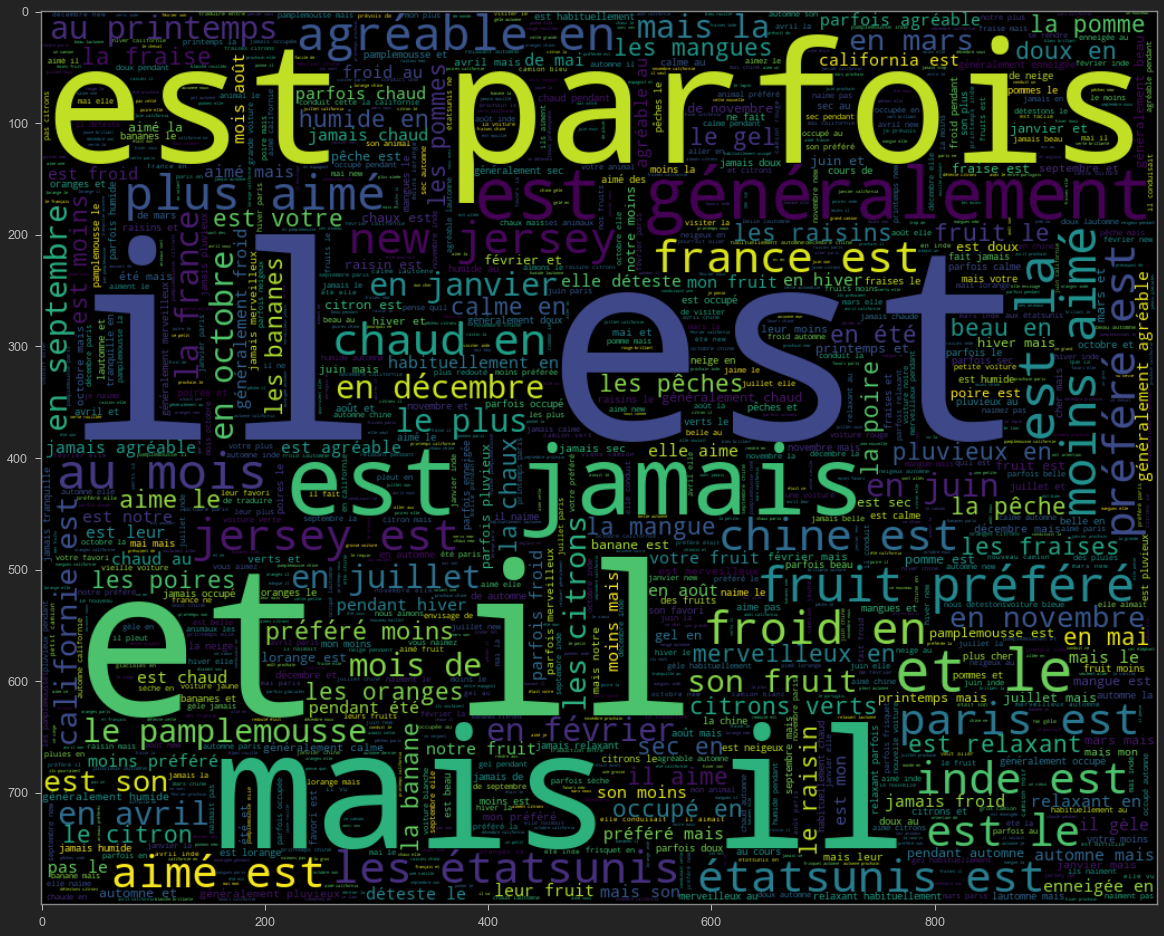

In [27]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000 , width=1000 , height=800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [28]:
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)
french_words_counts =  Counter(words)   
french_words_counts = sorted(french_words_counts.items() , key = operator.itemgetter(1),reverse= True)
french_words = []
french_counts  = []
for i in range(len(french_words_counts)):
    french_words.append(french_words_counts[i][0])
    french_counts.append(french_words_counts[i][1])
fig  = px.bar(x = french_words , y = french_counts)
fig.show()   
        

In [29]:
def tokeinze_and_pad(x,maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences  = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen=maxlen , padding='post')
    return tokenizer, sequences ,padded

In [30]:
x_tok , x_seq , x_pad = tokeinze_and_pad(df.english , maxlen_french)
y_tok , y_seq , y_pad = tokeinze_and_pad(df.french , maxlen_french)


In [31]:
print("The tokenized version for documents \n" , df.english[-1:].item() , "\n is :", x_pad[-1:])

The tokenized version for documents 
 the orange is her favorite fruit  but the banana is your favorite  
 is : [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0]]


In [32]:
print("The tokenized version for documents \n" , df.french[-1:].item() , "\n is :", y_pad[-1:])

The tokenized version for documents 
 lorange est son fruit préféré  mais la banane est votre favori  
 is : [[83  1 20 16 17  5  7 86  1 39 92  0  0  0  0  0  0  0  0  0  0]]


In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  =  train_test_split(x_pad , y_pad  ,test_size = 0.1)


In [34]:
english_vocab_size =  total_english_words +1
french_vocab_size  = total_french_words + 1

model = Sequential()
model.add(Embedding(english_vocab_size , 256 , input_length = maxlen_english , mask_zero =True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256,return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size , activation = 'softmax')))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics  = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 21, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 21, 346)           88922     
Total params: 1,190,746
Trainable params: 1,190,746
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_train = np.expand_dims(y_train , axis = 2)
y_train.shape

(124074, 21, 1)

In [36]:
model.fit(x_train , y_train , batch_size= 1024 , validation_split=0.1 , epochs =10)


Epoch 1/10
110/110 [==============================] - 192s 2s/step - loss: 2.8664 - accuracy: 0.4566 - val_loss: 2.2435 - val_accuracy: 0.5058
Epoch 2/10
110/110 [==============================] - 202s 2s/step - loss: 2.0093 - accuracy: 0.5413 - val_loss: 1.7205 - val_accuracy: 0.5753
Epoch 3/10
110/110 [==============================] - 199s 2s/step - loss: 1.5992 - accuracy: 0.5888 - val_loss: 1.4728 - val_accuracy: 0.6063
Epoch 4/10
110/110 [==============================] - 195s 2s/step - loss: 1.3662 - accuracy: 0.6246 - val_loss: 1.2805 - val_accuracy: 0.6385
Epoch 5/10
110/110 [==============================] - 198s 2s/step - loss: 1.1567 - accuracy: 0.6714 - val_loss: 1.1120 - val_accuracy: 0.6798
Epoch 6/10
110/110 [==============================] - 197s 2s/step - loss: 0.9926 - accuracy: 0.7176 - val_loss: 0.9445 - val_accuracy: 0.7275
Epoch 7/10
110/110 [==============================] - 200s 2s/step - loss: 0.8715 - accuracy: 0.7506 - val_loss: 0.8555 - val_accuracy: 0.7501

In [38]:
model.save("myWeights.h5")

In [39]:
y_pred =  model.predict(x_test)

In [40]:
y_pred

array([[[4.84090106e-06, 2.87157693e-03, 3.53678820e-06, ...,
         1.51055076e-07, 6.07357649e-08, 1.78967795e-07],
        [7.21001499e-08, 9.66854870e-01, 1.15245109e-06, ...,
         1.72431736e-09, 6.43647358e-10, 2.44233567e-09],
        [6.56890563e-07, 1.08758017e-01, 1.52070355e-02, ...,
         3.85517893e-08, 9.99703076e-09, 5.52274138e-08],
        ...,
        [9.99825180e-01, 3.94609287e-06, 1.42114832e-05, ...,
         6.06543852e-12, 1.03632979e-11, 2.38868179e-11],
        [9.99825180e-01, 3.95292909e-06, 1.41437176e-05, ...,
         6.08771497e-12, 1.03863706e-11, 2.40761838e-11],
        [9.99824226e-01, 3.96747691e-06, 1.41462133e-05, ...,
         6.10203077e-12, 1.04024593e-11, 2.42411698e-11]],

       [[1.71395277e-06, 1.66874030e-03, 3.13693386e-06, ...,
         1.18387199e-07, 4.37372307e-08, 1.29645372e-07],
        [8.26788167e-08, 9.68502760e-01, 3.38602331e-06, ...,
         2.64161470e-09, 1.23578303e-09, 4.43253789e-09],
        [2.15083659e-07, 

In [51]:
def prediction(x, x_tokenizer = x_tok, y_tokenizer = y_tok):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [52]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tok)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tok)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - france is cold during april but it is freezing in september          

Original French word - france est froid en avril mais il gèle en septembre           

Predicted French word - france est relaxant en avril mais il gèle en septembre           




Original English word - france is cold during december but it is wet in march          

Original French word - france est froid en décembre mais il est humide en mars          

Predicted French word - france est froid en décembre mais il est froid en mars          




Original English word - he dislikes apples lemons and oranges               

Original French word - il déteste les pommes les citrons et les oranges            

Predicted French word - il déteste les les les citrons et les oranges            




Original English word - she dislikes grapefruit and apples                

Original French word - elle déteste le pamplemousse et les pommes              

Predicted French word - elle déteste le pample